In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge

In [3]:
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

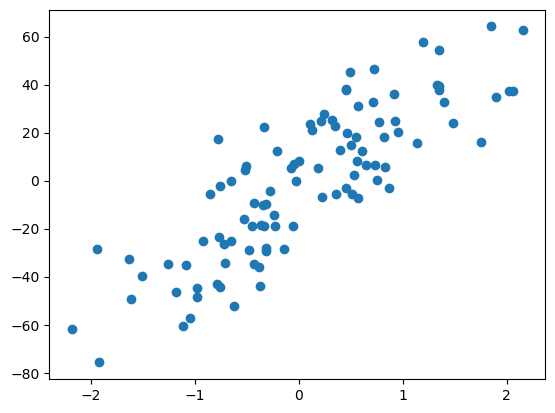

In [5]:
plt.scatter(X,y)

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X,y)

LinearRegression()

In [8]:
print(lr.coef_)

[27.82809103]


In [9]:
print(lr.intercept_)

-2.29474455867698


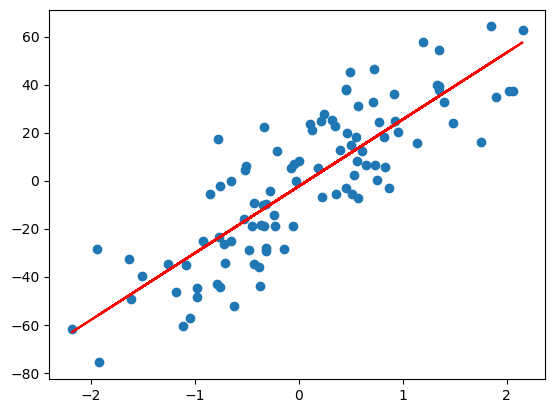

In [11]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X), color='red')

In [21]:
rr = Ridge(alpha=10)

In [22]:
rr.fit(X,y)

Ridge(alpha=10)

In [23]:
rr.coef_

array([24.9546267])

In [24]:
rr.intercept_

np.float64(-2.1269130035235726)

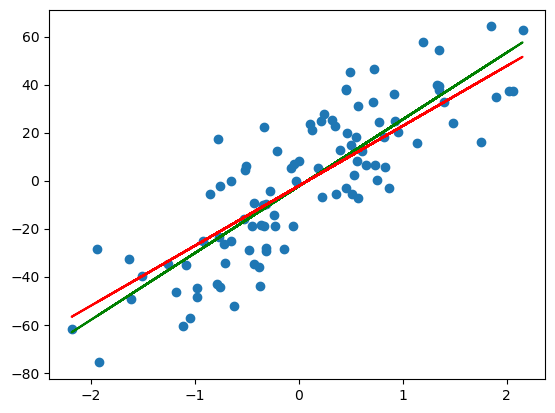

In [25]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X), color='green')
plt.plot(X,rr.predict(X), color='red')

In [26]:
rr1 = Ridge(alpha=100)

In [27]:
rr1.fit(X,y)

Ridge(alpha=100)

In [28]:
rr1.coef_

array([12.93442104])

In [30]:
rr1.intercept_

np.float64(-1.4248441496033308)

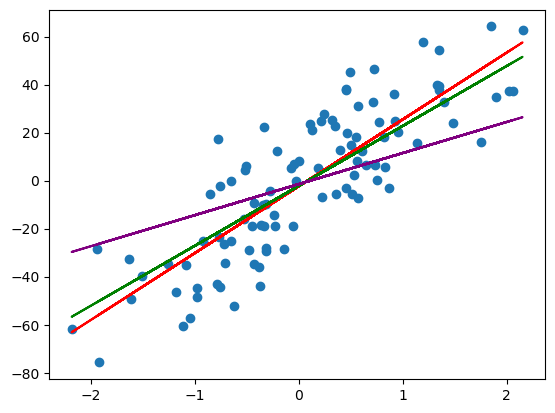

In [32]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X), color='red')
plt.plot(X,rr.predict(X), color='green')
plt.plot(X,rr1.predict(X), color='purple')

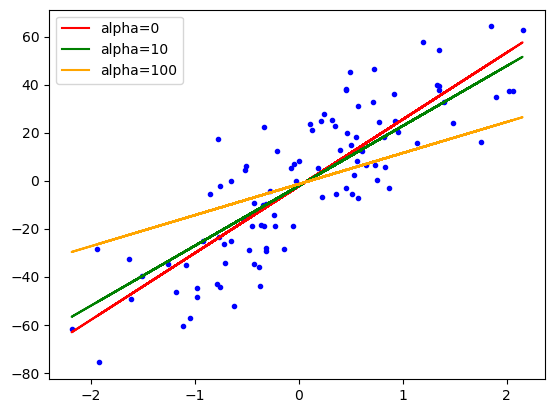

In [33]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [36]:
print("alpha = 0 -> ", r2_score(y,lr.predict(X)))
print("alpha = 10 -> ", r2_score(y,rr.predict(X)))
print("alpha = 100 -> ", r2_score(y,rr1.predict(X)))

alpha = 0 ->  0.7035182396294911
alpha = 10 ->  0.6960172225909291
alpha = 100 ->  0.5020011026155695


#### Here alpha=0 that is linear regression line is best since value of m is not so big and line is not overfitting here

# Creating own Ridge Regression class

In [40]:
class MeraRidge:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num = num + (y_train[i]-y_train.mean())* (X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())

        self.m = num/ (den + self.alpha)
        self.b = y_train.mean() - self.m * X_train.mean()
        print(self.m, self.b)

    def predict(X_test):
        pass

In [41]:
mr = MeraRidge(alpha=10)

In [42]:
mr.fit(X,y)

[24.9546267] [-2.126913]


In [43]:
rr.coef_

array([24.9546267])

In [44]:
rr.intercept_

np.float64(-2.1269130035235726)

In [45]:
mr1 = MeraRidge(alpha=100)

In [46]:
mr1.fit(X,y)

[12.93442104] [-1.42484415]


In [47]:
rr1.coef_

array([12.93442104])

In [49]:
rr1.intercept_

np.float64(-1.4248441496033308)

## So here we made exactly the same predefined Ridge class